# Exploring r/redpillwomen submisions and comments

## Libraries & Setup

### Install

In [1]:
%pip install pandas numpy==1.24 matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install bertopic #[spacy]

Note: you may need to restart the kernel to use updated packages.


In [4]:
# %pip install NewsSentiment

In [5]:
%pip install -U sentence-transformers

Note: you may need to restart the kernel to use updated packages.


### Imports

In [6]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

In [7]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired

/Users/tilmankerl/Documents/UNI/SICSS/reddit-pills/.venv/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/tilmankerl/Documents/UNI/SICSS/reddit-pills/.venv/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/tilmankerl/Documents/

In [8]:
# Use a pipeline as a high-level helper
from transformers import pipeline

### General configs

In [9]:
# matplotlib theme
plt.style.use('ggplot')

plt.style.use('seaborn-v0_8-ticks')
plt.rcParams["axes.linewidth"] = 0

### Data loading

In [10]:
# get DATA_DIR
DATA_DIR = os.path.join(Path(os.path.abspath("")).parent, "data")
print(DATA_DIR)

/Users/tilmankerl/Documents/UNI/SICSS/reddit-pills/data


In [11]:
submission_redpill = pd.read_csv(
    f"{DATA_DIR}/submission_redpill_with_topic.csv",   
)
comments_redpill = pd.read_csv(
    f"{DATA_DIR}/redpill_comments_topic_sentiment_emotions.csv"
)

/var/folders/0t/46569zhs0mng6tbft4v9wks40000gn/T/ipykernel_47905/3355685823.py:4: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  comments_redpill = pd.read_csv(


In [12]:
submission_redpill.head()

,score,date,title,author_flair_text,link_flair_text,locked,over_18,author,link,body,month,year,month_year,date_ordinal,doc_text,topic,topic_label
0,8,2013-06-17,Suggested Reading List?,Endorsed Woman,NaN,False,False,u/margerym,https://www.reddit.com/r/RedPillWomen/comments...,(I'm new to reddit and the Red Pill community ...,6,2013,2013-06,735036,Suggested Reading List? (I'm new to reddit and...,2,RPW: Philosophy and Meta
1,20,2013-06-17,"What if you don't want kids, but still desire ...",NaN,NaN,False,False,u/alexkitsune,https://www.reddit.com/r/RedPillWomen/comments...,Basically all I see on TRP is all about having...,6,2013,2013-06,735036,"What if you don't want kids, but still desire ...",1,Education and Carreer
2,54,2013-06-17,What's the point if women are going to hit the...,NaN,NaN,False,False,u/MissCherryPi,https://www.reddit.com/r/RedPillWomen/comments...,"According to TRP, men can always build attract...",6,2013,2013-06,735036,What's the point if women are going to hit the...,2,RPW: Philosophy and Meta
3,13,2013-06-17,[Mod] Posting Rules,NaN,NaN,False,False,u/redpillschool,https://www.reddit.com/r/RedPillWomen/comments...,**Posting Submission Rules** * New submissions...,6,2013,2013-06,735036,[Mod] Posting Rules **Posting Submission Rules...,2,RPW: Philosophy and Meta
4,8,2013-06-18,Apparently this is the place I should post,NaN,NaN,False,False,u/myfavoritethrowaway9,https://www.reddit.com/r/RedPillWomen/comments...,I made a post in TRP earlier but someone sugge...,6,2013,2013-06,735037,Apparently this is the place I should post I m...,3,Gender roles: Alpha/Beta


In [13]:
comments_redpill.head()

,index,score,date,is_submitter,author,link,body,topic,sentiment_label,sentiment_score,emotions_label,emotions_score
0,1,1,2017-10-01,False,u/throwawayklutch,https://www.reddit.com/r/RedPillWomen/comments...,"To me, these women seem like they just have no...",3.0,negative,0.729024,neutral,0.719759
1,2,2,2017-10-01,False,u/SouthernAthena,https://www.reddit.com/r/RedPillWomen/comments...,That attitude will get them far in life. But y...,3.0,negative,0.433742,approval,0.661271
2,4,2,2017-10-01,False,u/thelampshade25,https://www.reddit.com/r/RedPillWomen/comments...,Very funny video i was loling the whole time,3.0,positive,0.982675,amusement,0.933962
3,5,3,2017-10-01,False,u/indivisibleremainder,https://www.reddit.com/r/RedPillWomen/comments...,bucko,3.0,neutral,0.659083,neutral,0.969720
4,6,3,2017-10-01,False,u/indivisibleremainder,https://www.reddit.com/r/RedPillWomen/comments...,it's a statistical/evolutionary phenomenon. th...,3.0,neutral,0.588149,neutral,0.855850


In [14]:
# feature types
submission_redpill.date = pd.to_datetime(submission_redpill.date)
submission_redpill['year'] = submission_redpill['date'].dt.year
submission_redpill['month'] = submission_redpill['date'].dt.month

# # topic & topic_label as categorical
# submission_redpill['topic'] = submission_redpill['topic'].astype('category')
# submission_redpill['topic_label'] = submission_redpill['topic_label'].astype('category')

# # sentiment as categorical
# comments_redpill['sentiment_label'] = comments_redpill['sentiment_label'].astype('category')

# # sentiment as categorical
# comments_redpill['emotions_label'] = comments_redpill['emotion_label'].astype('category')

In [15]:
print(
    submission_redpill.date.min(),
    submission_redpill.date.max()
)

2013-06-17 00:00:00 2022-12-31 00:00:00


### Model loading

In [16]:
topic_model = BERTopic.load("../models/redPillSubmissions-20")

emotions_pipe = pipeline("text-classification", model="SamLowe/roberta-base-go_emotions")
sentiment_pipe = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


## Questions

Some preparation - we will need this later on:

In [39]:
# building the topic dictionary mapping topic number to topic label, we will use this later
topic2num_df = submission_redpill[['topic', 'topic_label']].drop_duplicates(subset=['topic']).sort_values(by='topic')
topic2num = dict(zip(topic2num_df.topic, topic2num_df.topic_label))

topic2num_with_m1 = topic2num.copy()
del topic2num[-1]

#### How does the topic distribution look like?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Baseline relationship issues'),
  Text(1, 0, 'relationship issues: sex'),
  Text(2, 0, 'Education and Carreer'),
  Text(3, 0, 'RPW: Philosophy and Meta'),
  Text(4, 0, 'Gender roles: Alpha/Beta'),
  Text(5, 0, 'Body image'),
  Text(6, 0, 'Recipes (rec.)'),
  Text(7, 0, 'Personal self improvement (rec.)'),
  Text(8, 0, 'Self care (rec.)'),
  Text(9, 0, 'Fashion '),
  Text(10, 0, 'Flirting'),
  Text(11, 0, 'Sexual experience'),
  Text(12, 0, 'Hair styles'),
  Text(13, 0, 'Body self improvement (rec.)'),
  Text(14, 0, 'Simple Questions'),
  Text(15, 0, 'Homemaking (rec.)'),
  Text(16, 0, 'Music'),
  Text(17, 0, 'Covid'),
  Text(18, 0, 'Fertility'),
  Text(19, 0, 'Tarot Tuesday')])

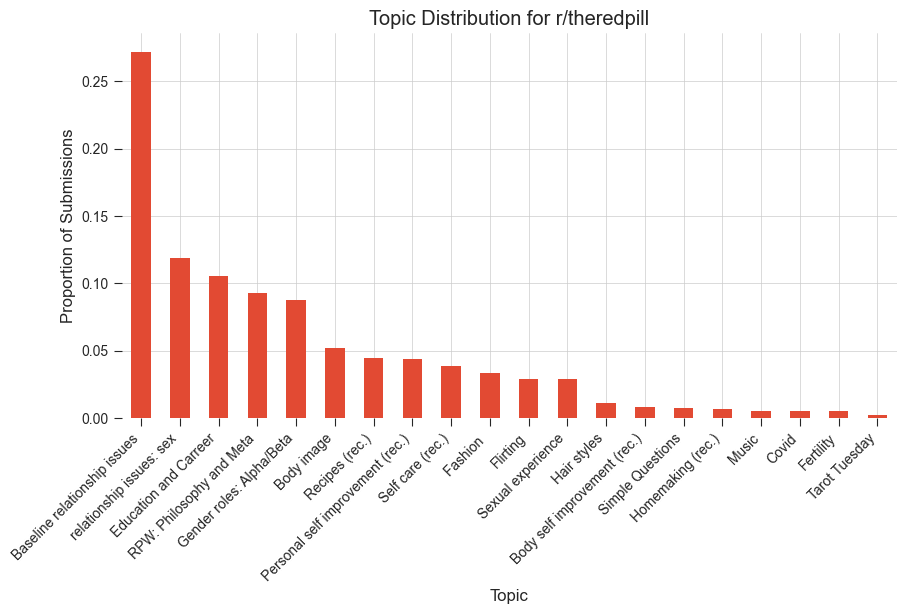

In [41]:
submission_redpill.topic.value_counts(normalize=True).plot(
    kind='bar', 
    title='Topic Distribution for r/theredpill',
    figsize=(10, 5),
    xlabel='Topic',
    ylabel='Proportion of Submissions'
)
plt.grid(linewidth = 0.5)
# set x axis label with topic2num dict values
plt.xticks(range(len(topic2num_with_m1)), list(topic2num_with_m1.values()))
# rotate x axis labels
plt.xticks(rotation=45, horizontalalignment='right')

### Which topics are successful in terms of upvotes and comments?

In [17]:
# mean score per to pic anf get the top 10 topics
top_topics = submission_redpill.groupby('topic_label')["score"].mean().sort_values(ascending=False)

In [18]:
top_topics.head()

topic_label
Baseline relationship issues        30.214900
Gender roles: Alpha/Beta            25.225468
Personal self improvement (rec.)    24.498480
Education and Carreer               24.409975
Self care (rec.)                    24.403780
Name: score, dtype: float64

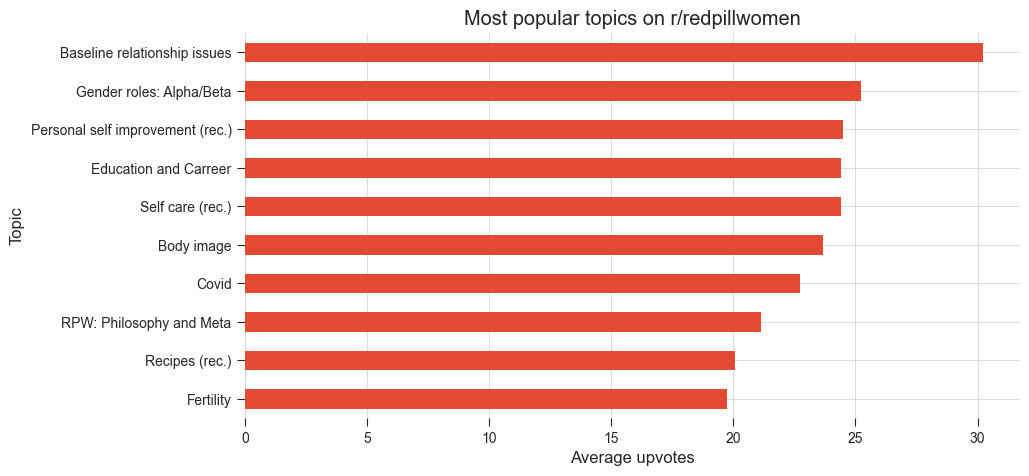

In [19]:
top_topics.sort_values(ascending=True).tail(10).plot.barh(
    figsize=(10, 5), 
    title='Most popular topics on r/redpillwomen',
    # color='#d56fa2',
    legend=False,
    xlabel='Average upvotes',
    ylabel='Topic'

)
plt.grid(linewidth = 0.5)

In [20]:
submission_redpill.to_csv('../data/submission_redpill_with_topic.csv', index=False)

### Sentiment per topics

We want to look at the sentiment and emotions of comments per topic.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'relationship issues: sex'),
  Text(1, 0, 'Education and Carreer'),
  Text(2, 0, 'RPW: Philosophy and Meta'),
  Text(3, 0, 'Gender roles: Alpha/Beta'),
  Text(4, 0, 'Body image'),
  Text(5, 0, 'Recipes (rec.)'),
  Text(6, 0, 'Personal self improvement (rec.)'),
  Text(7, 0, 'Self care (rec.)'),
  Text(8, 0, 'Fashion '),
  Text(9, 0, 'Flirting'),
  Text(10, 0, 'Sexual experience'),
  Text(11, 0, 'Hair styles'),
  Text(12, 0, 'Body self improvement (rec.)'),
  Text(13, 0, 'Simple Questions'),
  Text(14, 0, 'Homemaking (rec.)'),
  Text(15, 0, 'Music'),
  Text(16, 0, 'Covid'),
  Text(17, 0, 'Fertility'),
  Text(18, 0, 'Tarot Tuesday')])

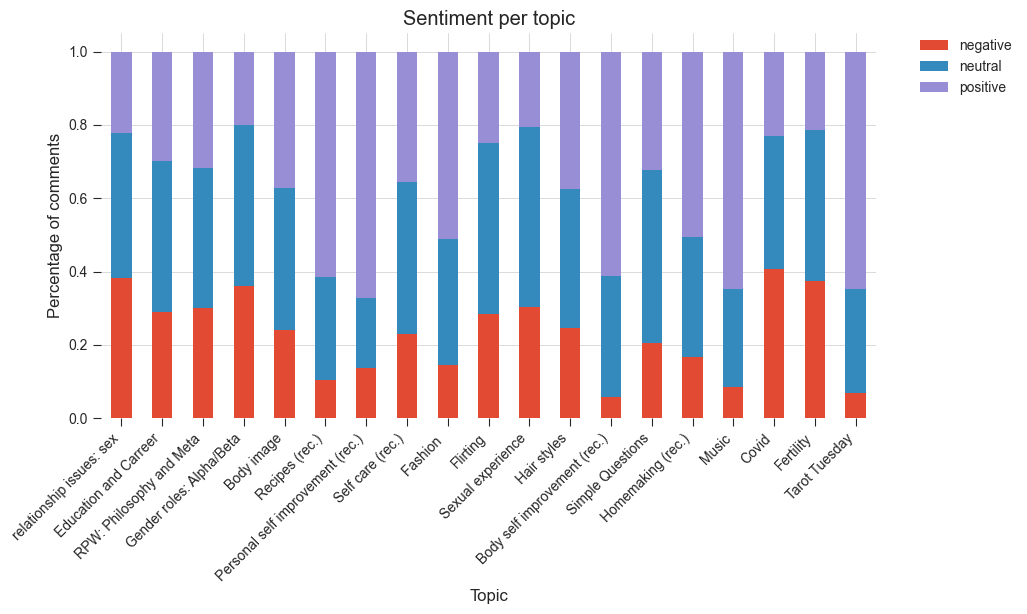

In [22]:
comments_redpill.groupby("topic").sentiment_label.value_counts(normalize=True).unstack().plot(
    kind='bar', 
    stacked=True, 
    figsize=(10, 5), 
    title="Sentiment per topic",
    ylabel="Percentage of comments",
    xlabel="Topic"
)
# prettier legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., facecolor='white')
plt.grid(linewidth = 0.5)
# set x axis label with topic2num dict values
plt.xticks(range(len(topic2num)), list(topic2num.values()))
# rotate x axis labels
plt.xticks(rotation=45, horizontalalignment='right')


### General emotions

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, 'neutral'),
  Text(1, 0, 'approval'),
  Text(2, 0, 'gratitude'),
  Text(3, 0, 'curiosity'),
  Text(4, 0, 'admiration'),
  Text(5, 0, 'caring'),
  Text(6, 0, 'disapproval'),
  Text(7, 0, 'love'),
  Text(8, 0, 'amusement'),
  Text(9, 0, 'confusion'),
  Text(10, 0, 'joy'),
  Text(11, 0, 'annoyance'),
  Text(12, 0, 'optimism'),
  Text(13, 0, 'sadness'),
  Text(14, 0, 'disappointment'),
  Text(15, 0, 'remorse'),
  Text(16, 0, 'realization'),
  Text(17, 0, 'desire'),
  Text(18, 0, 'fear'),
  Text(19, 0, 'excitement'),
  Text(20, 0, 'surprise'),
  Text(21, 0, 'anger'),
  Text(22, 0, 'disgust'),
  Text(23, 0, 'nervousness'),
  Text(24, 0, 'embarrassment'),
  Text(25, 0, 'pride'),
  Text(26, 0, 'relief')])

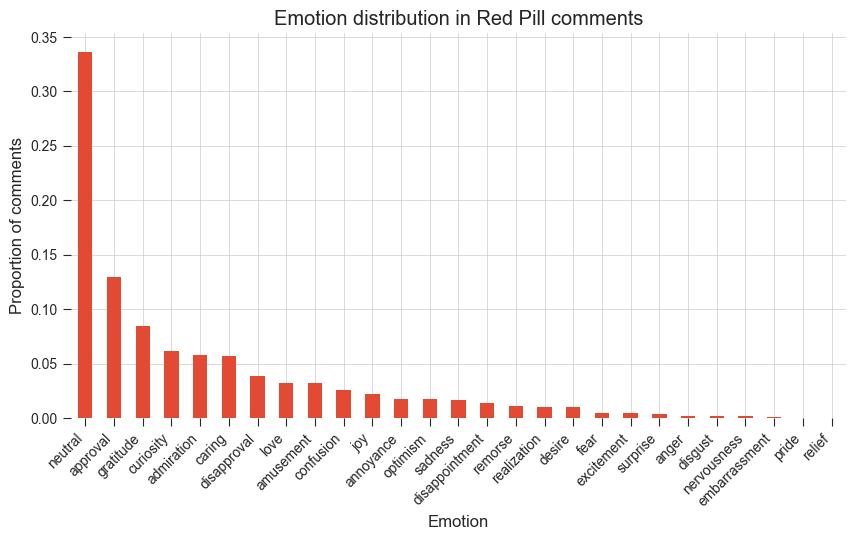

In [23]:
# get most prominent emotions overall
comments_redpill.emotions_label.value_counts(normalize=True).plot(
    kind='bar', 
    title='Emotion distribution in Red Pill comments',
    figsize=(10, 5),
    xlabel='Emotion',
    ylabel='Proportion of comments'
)
plt.grid(linewidth = 0.5)
plt.xticks(rotation=45, horizontalalignment='right')

### Emotions for specific topics

In [24]:
comments_redpill_copy = comments_redpill.copy()

Based on the top-n emotions overall, we look at the distributions of them in all topics. Top-n is choosen to avoid overplotting.

In [25]:
# get top 10 emotions overall & drop neutral
top_10_emotions = comments_redpill_copy.emotions_label.value_counts().head(10).index.tolist()
if 'neutral' in top_10_emotions:
    top_10_emotions.remove('neutral')

In [26]:
# replace all emtions that are not in top_10_emotions with 'other'
comments_redpill_copy['emotions_label'] = comments_redpill_copy.emotions_label.apply(lambda x: x if x in top_10_emotions else 'other')
# drop all rows that have 'other' as emotion
comments_redpill_copy = comments_redpill_copy[comments_redpill_copy.emotions_label != 'other']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'relationship issues: sex'),
  Text(1, 0, 'Education and Carreer'),
  Text(2, 0, 'RPW: Philosophy and Meta'),
  Text(3, 0, 'Gender roles: Alpha/Beta'),
  Text(4, 0, 'Body image'),
  Text(5, 0, 'Recipes (rec.)'),
  Text(6, 0, 'Personal self improvement (rec.)'),
  Text(7, 0, 'Self care (rec.)'),
  Text(8, 0, 'Fashion '),
  Text(9, 0, 'Flirting'),
  Text(10, 0, 'Sexual experience'),
  Text(11, 0, 'Hair styles'),
  Text(12, 0, 'Body self improvement (rec.)'),
  Text(13, 0, 'Simple Questions'),
  Text(14, 0, 'Homemaking (rec.)'),
  Text(15, 0, 'Music'),
  Text(16, 0, 'Covid'),
  Text(17, 0, 'Fertility'),
  Text(18, 0, 'Tarot Tuesday')])

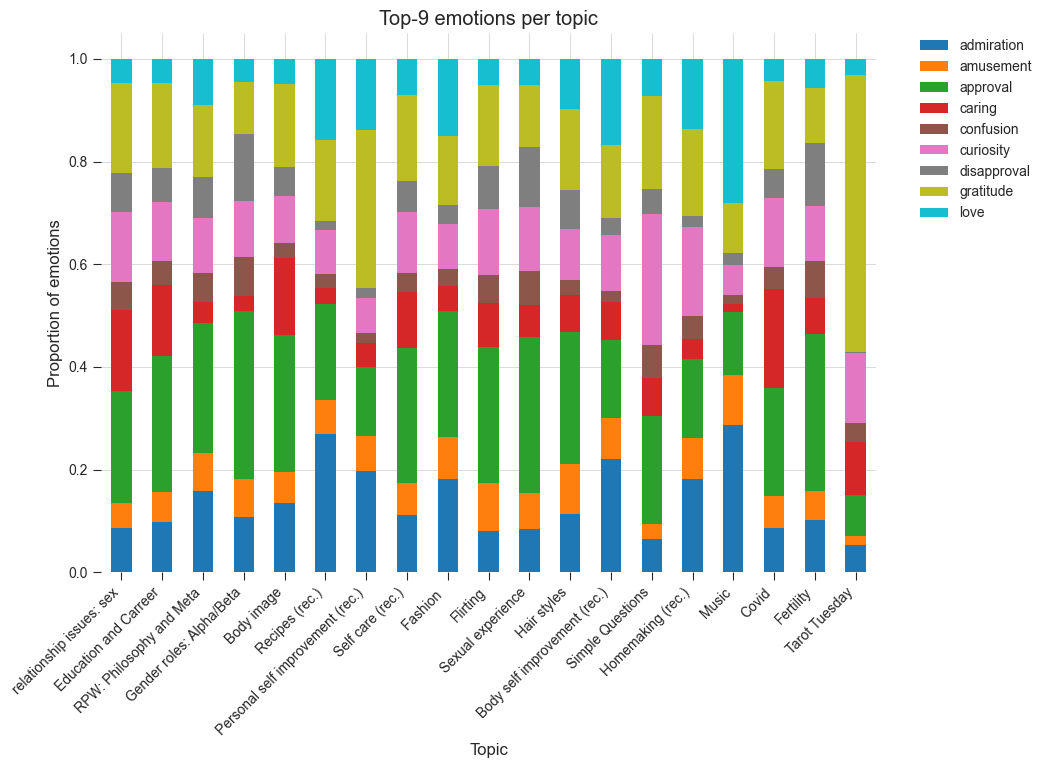

In [28]:
# use top_10_emotions list to show proportion of emotions per topic
comments_redpill_copy.groupby('topic').emotions_label.value_counts(normalize=True).unstack().plot.bar(
    stacked=True, 
    figsize=(10,7),
    title='Top-9 emotions per topic',
    ylabel='Proportion of emotions',
    cmap="tab10",
    xlabel='Topic'
)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., facecolor='white')
plt.grid(linewidth = 0.5)
# set x axis label with topic2num dict values
plt.xticks(range(len(topic2num)), list(topic2num.values()))
# rotate x axis labels
plt.xticks(rotation=45, horizontalalignment='right')